# Currency Ising Model Visualisations

### Import Libraries

In [1]:
# Import necessary libraries for data handling and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Set up the visualisation settings for seaborn
sns.set_theme(style="whitegrid")

### Load Optimised Parameters

##### Define the file paths for the optimised J matrix and h vector

In [2]:
J_matrix_file_path = 'Results/J_matrix.csv'  # Path to the J matrix csv file
h_vector_file_path = 'Results/h_vector.csv'  # Path to the h vector csv file
# 
# J_matrix_file_path = 'Results/optimised_J_matrix.csv'  # Path to the optimised J matrix csv file
# h_vector_file_path = 'Results/optimised_h_vector.csv'  # Path to the optimised h vector csv file
# 
# J_matrix_file_path = 'Results/optimised_J_matrix_extended.csv'  # Path to the extended optimised J matrix csv file
# h_vector_file_path = 'Results/optimised_h_vector_extended.csv'  # Path to the extended optimised h vector csv file

# J_matrix_file_path = 'Results/final_J_matrix_extended.csv'  # Path to the fianl J matrix csv file
# h_vector_file_path = 'Results/final_h_vector_extended.csv'  # Path to the final h vector csv file

# Load the optimised J matrix from the csv file
J_optimised_df = pd.read_csv(J_matrix_file_path)

# Extract currency symbols from the DataFrame
symbols = J_optimised_df.columns.tolist()

# Convert the DataFrame to a numpy array
J_optimised = J_optimised_df.values

# Load the optimised h vector from the Excel file
h_optimised = pd.read_csv(h_vector_file_path, header=None)[1].values

# Confirm the shapes of the loaded J matrix and h vector
print(f"Shape of optimised J matrix: {J_optimised.shape}")
print(f"Length of optimised h vector: {len(h_optimised)}")

Shape of optimised J matrix: (26, 26)
Length of optimised h vector: 26


### Function to Add Title and Subtitle

In [3]:
# Define a function to add a title and a subtitle to a matplotlib figure
def add_title_and_subtitle(title, subtitle, title_space=1.06, subtitle_space=1.03):
    """
    Add a main title and a subtitle to a matplotlib figure.

    Parameters:
    title (str): The main title text.
    subtitle (str): The subtitle text.
    title_space (float): The space above the title. Default is 1.06.
    subtitle_space (float): The space for the subtitle just below the title. Default is 1.03.
    """
    plt.title(title, y=title_space, fontsize=20)  # Add the main title with space adjustment
    plt.text(x=0.5, y=subtitle_space, s=subtitle, fontsize=16,
             ha='center', va='bottom', transform=plt.gca().transAxes)  # Add the subtitle

### Plot Heatmap of J Matrix

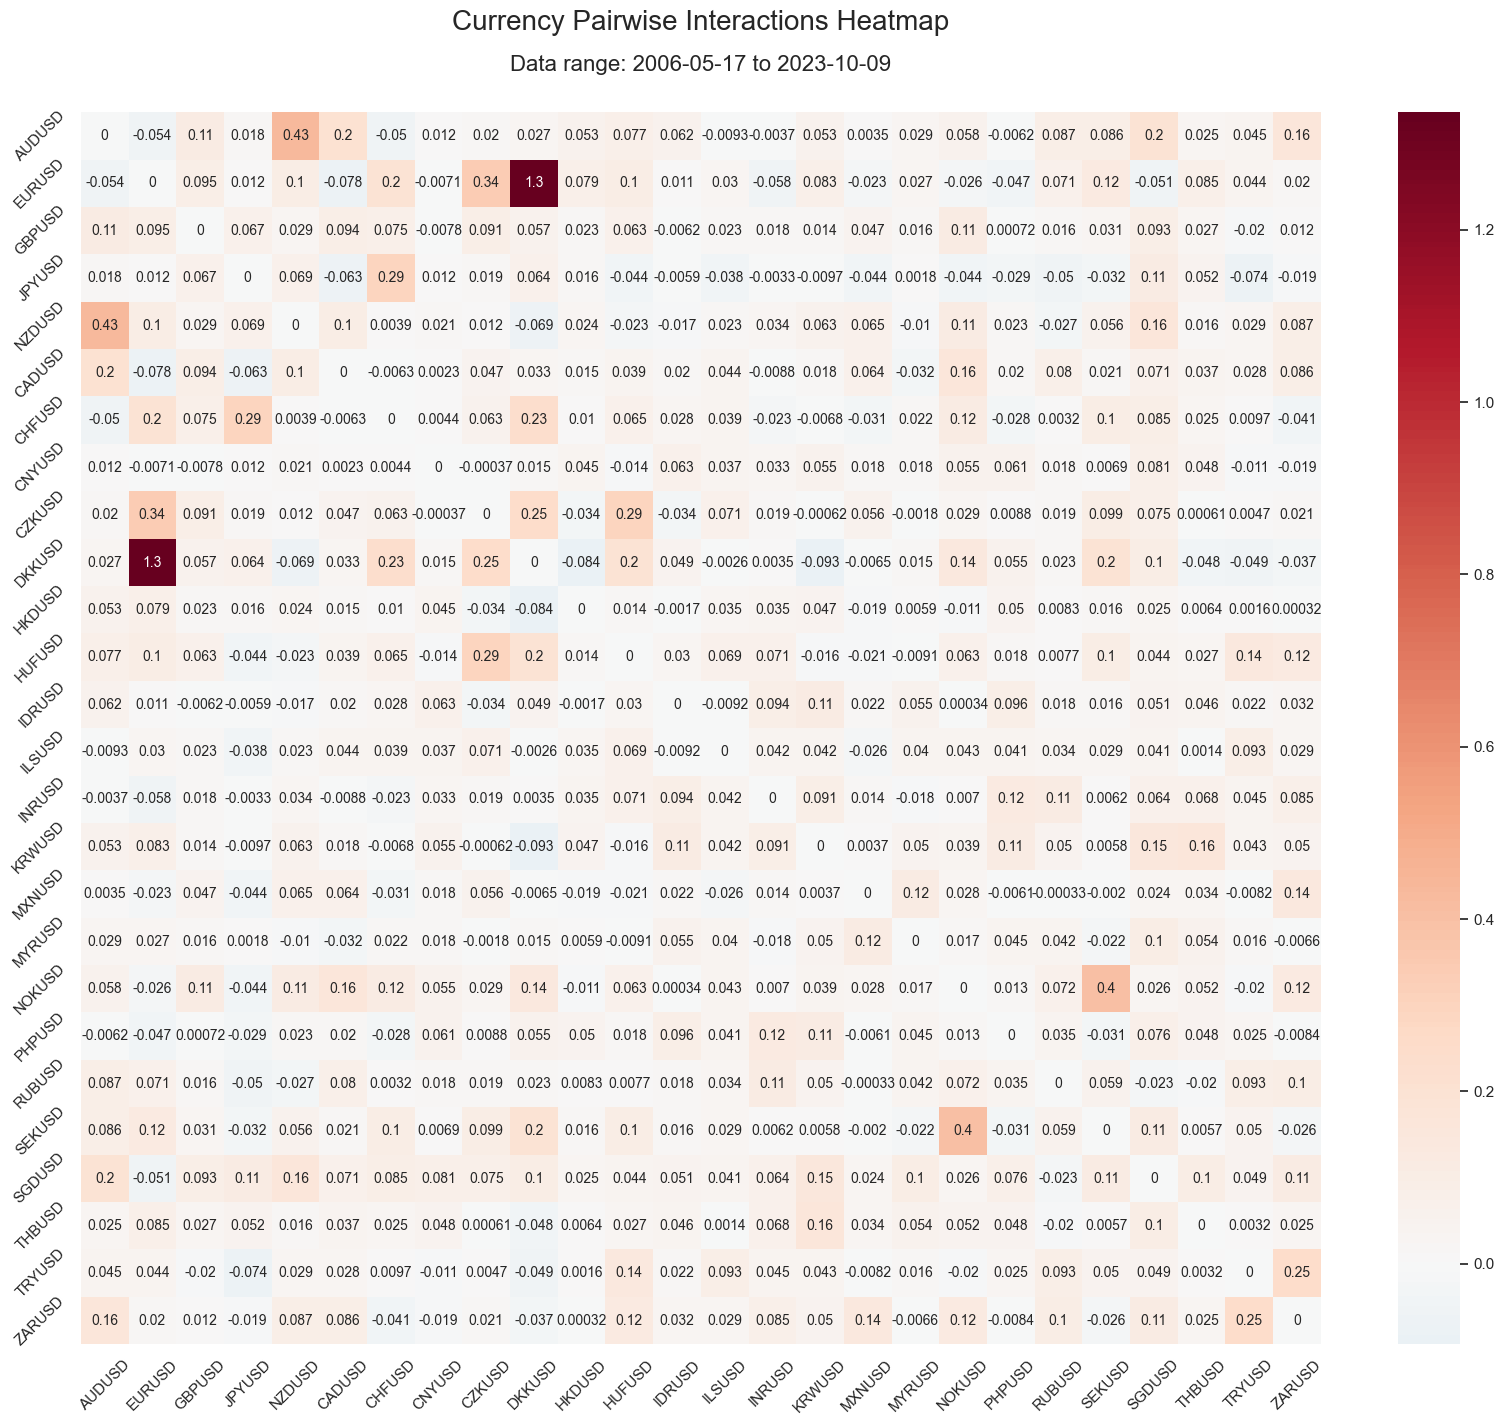

In [4]:
# Define a function to visualise the J matrix as a heatmap
def plot_heatmap(J, labels, title, subtitle):
    """
    Create a heatmap visualisation of the interaction matrix J.

    Parameters:
    J (np.array): The J matrix to be visualised.
    labels (list): The labels for the axes.
    """
    plt.figure(figsize=(20, 16))  # Set the size of the heatmap figure
    sns.heatmap(J, annot=True, annot_kws={"size": 10}, cmap='RdBu_r', center=0,
                xticklabels=labels, yticklabels=labels)  # Create the heatmap with annotations
    plt.xticks(rotation=45)  # Rotate x labels for better fit
    plt.yticks(rotation=45)  # Rotate y labels for better fit
    add_title_and_subtitle(title, subtitle)  # Add title and subtitle
    plt.show()  # Display the heatmap

# Visualise the optimised J matrix using the defined function
plot_heatmap(J_optimised, symbols, "Currency Pairwise Interactions Heatmap", "Data range: 2006-05-17 to 2023-10-09")

### Plot Bar Chart of h Vector

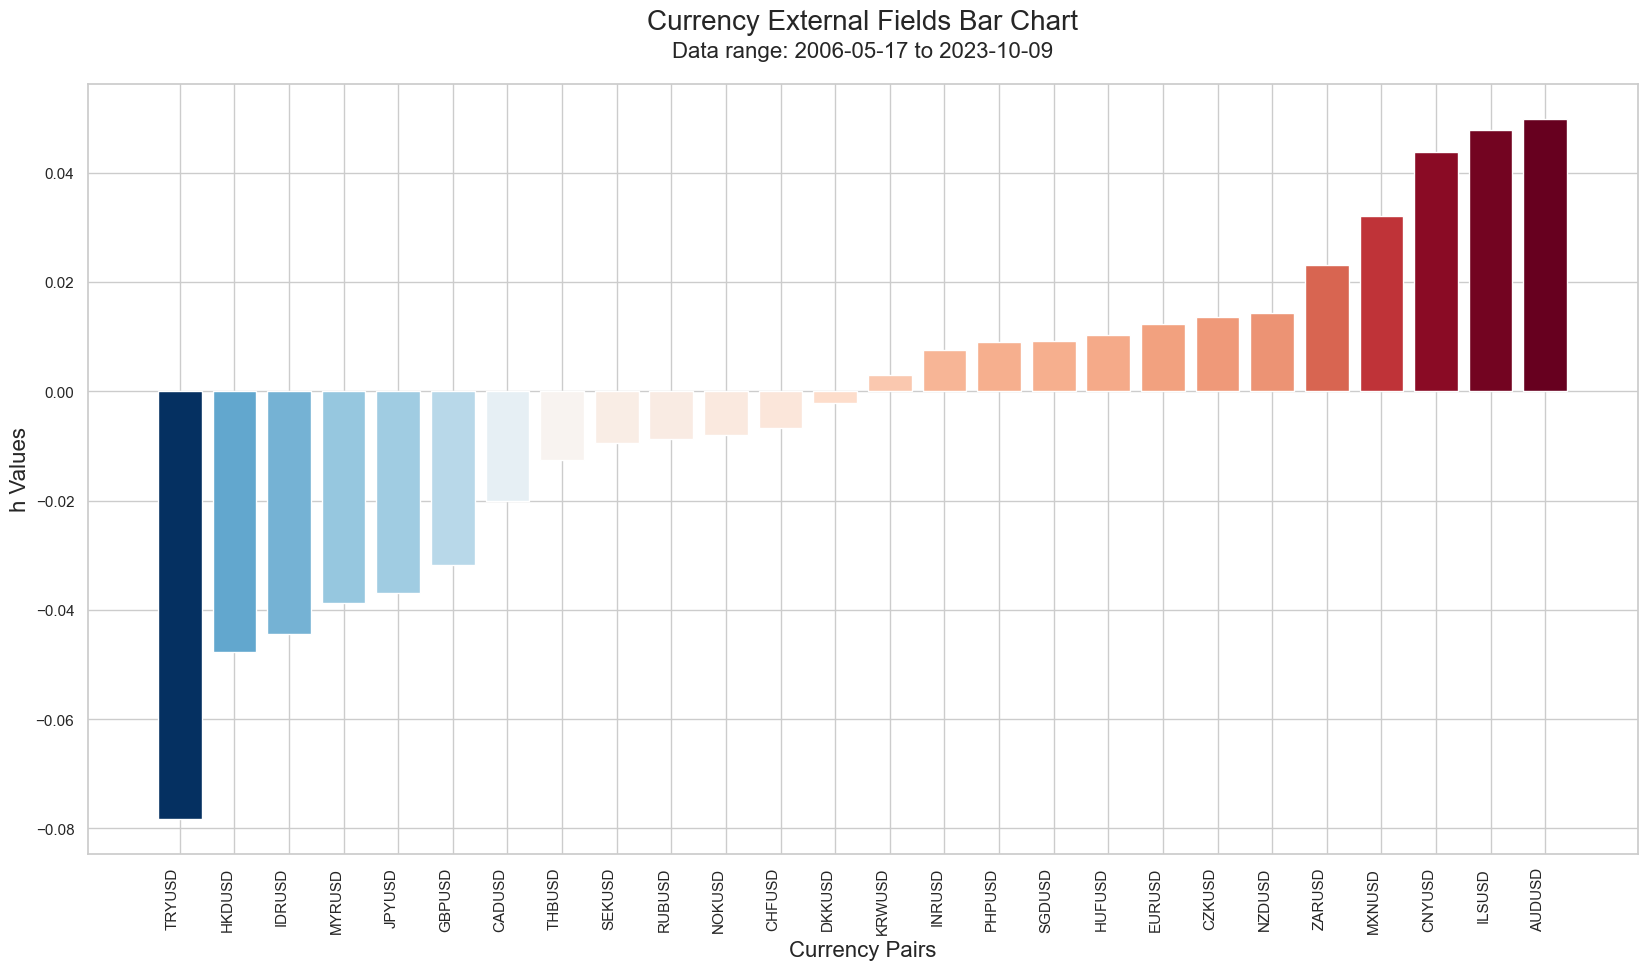

In [5]:
import matplotlib.cm as cm

# Define a function to visualise the h vector as a bar heatmap
def plot_external_field_barchart(h, labels):
    """
    Create a bar chart visualisation of the external field vector h.

    Parameters:
    h (np.array): The h vector to be visualised.
    labels (list): The labels for the bars.
    """
    # Normalize h values to the range [0, 1] for color mapping
    norm = plt.Normalize(min(h), max(h))
    # Create a color map
    cmap = cm.ScalarMappable(norm=norm, cmap='RdBu_r')

    # Sort the h values and corresponding labels
    sorted_indices = np.argsort(h)
    h_sorted = h[sorted_indices]
    labels_sorted = np.array(labels)[sorted_indices]

    # Set the figure size for better visibility
    plt.figure(figsize=(20, 10))

    # Create a barplot with sorted labels and h values
    for i, value in enumerate(h_sorted):
        color = cmap.to_rgba(value)
        plt.bar(labels_sorted[i], value, color=color)

    # Rotate the tick labels for better readability
    plt.xticks(rotation=90, ha='right')

    # Set the title and axis labels
    plt.xlabel("Currency Pairs", fontsize=16)
    plt.ylabel("h Values", fontsize=16)
    add_title_and_subtitle("Currency External Fields Bar Chart", "Data range: 2006-05-17 to 2023-10-09")

    # Show the bar plot
    plt.show()

# Visualise the optimised h vector using the defined function
plot_external_field_barchart(h_optimised, symbols)

### Plot Histograms of J and h

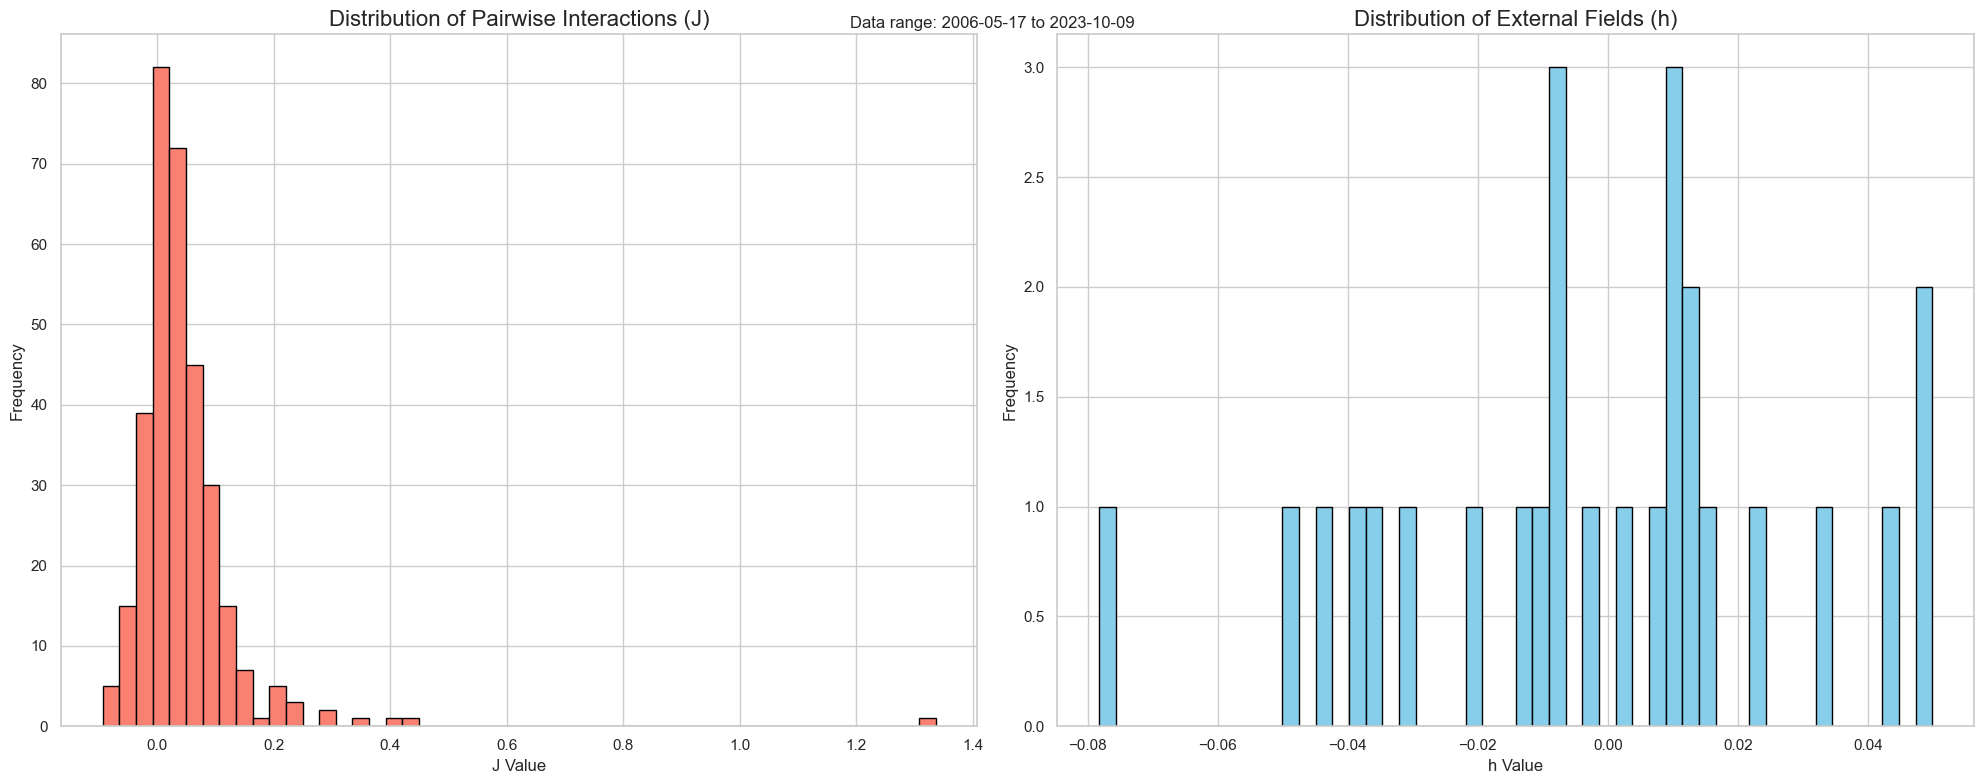

In [6]:
# Define a function to plot histograms for the J matrix and h vector
def plot_histograms(J, h, labels):
    """
    Plot histograms for the pairwise interactions (J matrix) and external fields (h vector).
    
    Args:
    J (numpy.ndarray): Pairwise interactions matrix.
    h (numpy.ndarray): External fields vector.
    labels (list): Labels for the currencies.
    """
    J_values = J[np.triu_indices_from(J, k=1)]  # Extract upper triangular elements of J

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    axes[0].hist(J_values, bins=50, color='salmon', edgecolor='black')
    axes[0].set_title('Distribution of Pairwise Interactions (J)', fontsize=16)
    axes[0].set_xlabel('J Value')
    axes[0].set_ylabel('Frequency')

    axes[1].hist(h, bins=50, color='skyblue', edgecolor='black')
    axes[1].set_title('Distribution of External Fields (h)', fontsize=16)
    axes[1].set_xlabel('h Value')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.suptitle("Data range: 2006-05-17 to 2023-10-09", fontsize=12, y=0.97)
    plt.show()

# Visualise the distributions of J and h
plot_histograms(J_optimised, h_optimised, symbols)

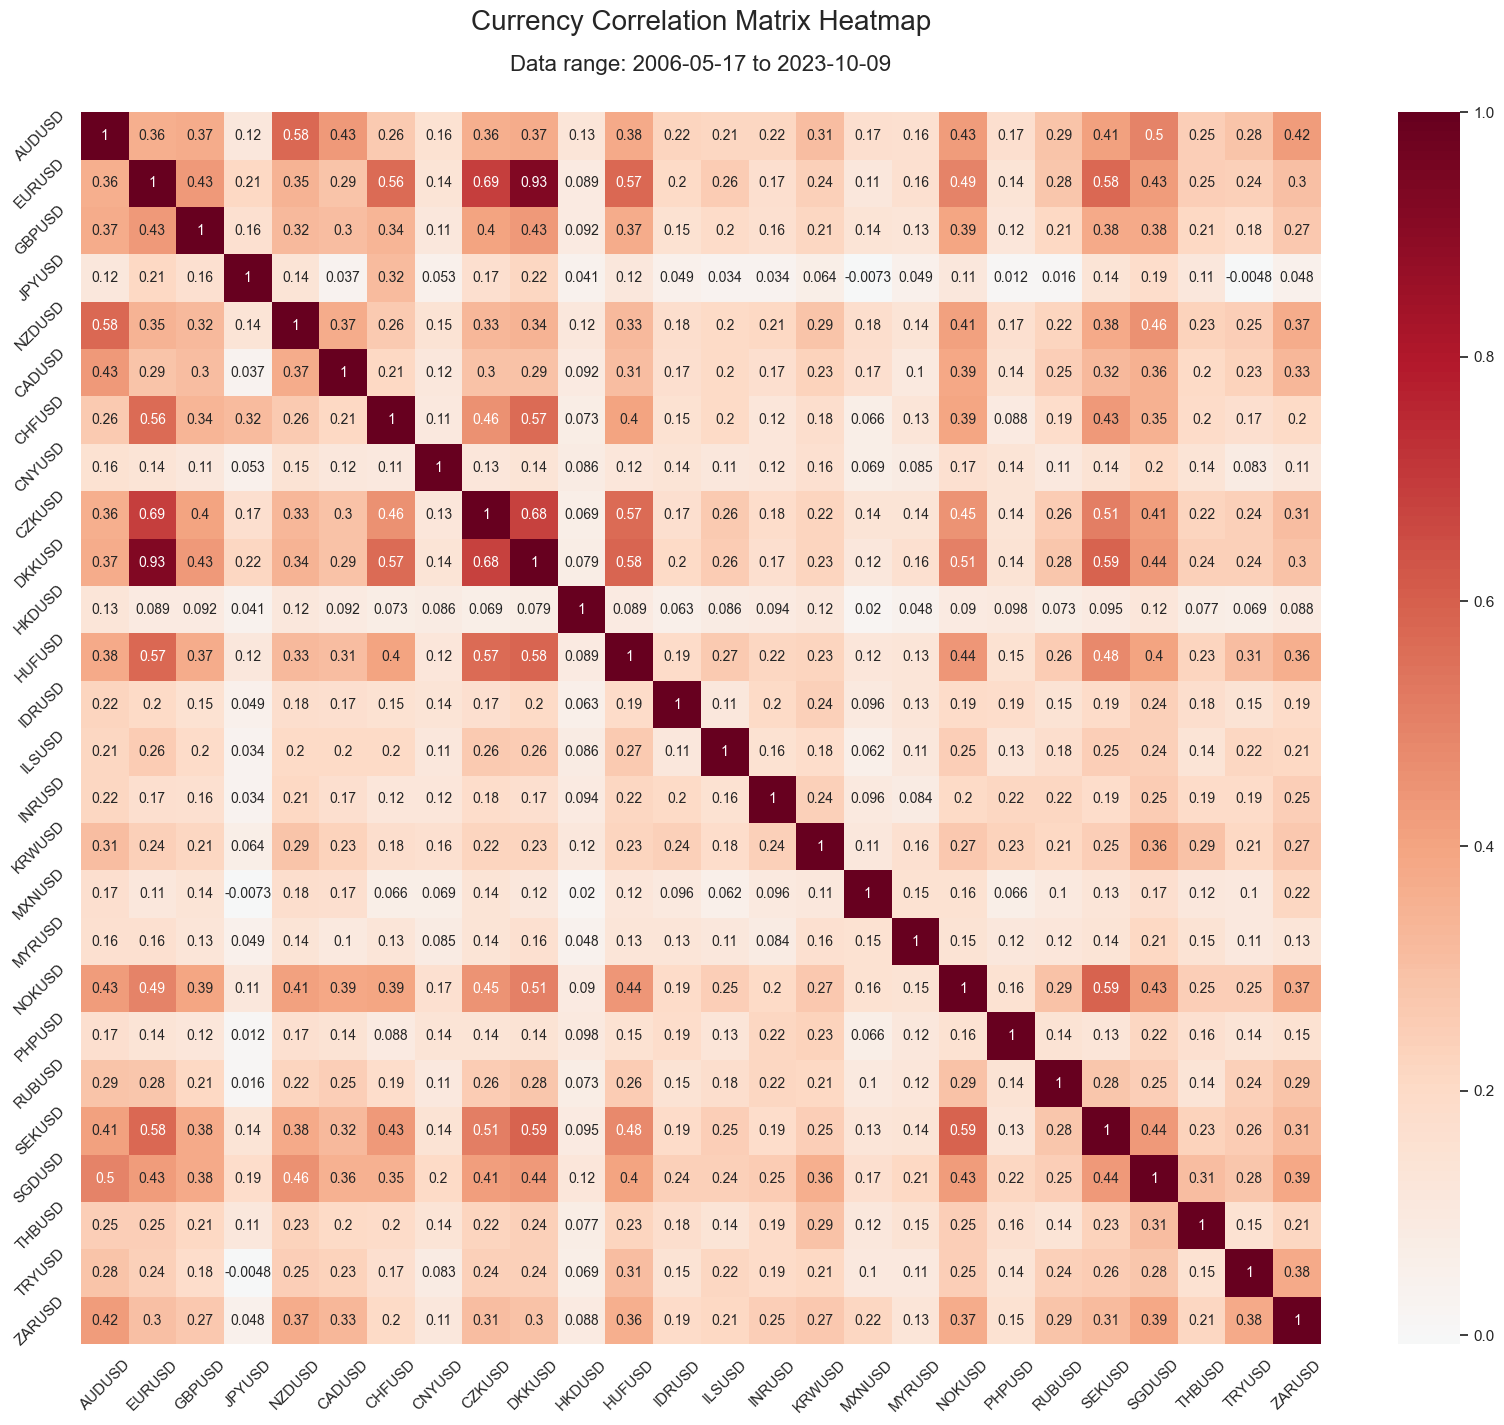

In [8]:
# Load the currency data from an csv file into a pandas DataFrame
df = pd.read_csv("Results/data_matrix.csv")

# Extract column names from the DataFrame excluding any non-currency columns like 'Date'
symbols = df.columns.tolist()[1:]

# Calculate the correlation matrix
correlation_matrix = df.drop(columns='Date').corr()

# Visualise the correlation matrix using the defined function
plot_heatmap(correlation_matrix, symbols, "Currency Correlation Matrix Heatmap", "Data range: 2006-05-17 to 2023-10-09")